In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lectura y guardado de las hojas de excel en un diccionario

In [264]:
diccionario_df = pd.read_excel('src/homicidios.xlsx', sheet_name=None)

Separacion de las hojas en dos dataframes diferentes para su posterior analisis

In [265]:
df_hechos_homicidios = diccionario_df['HECHOS']
df_victimas_homicidios = diccionario_df['VICTIMAS']

Ver cantidad de NaN

In [266]:
df_hechos_homicidios.info()
df_victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Ver diferentes valores de victimas para evitar o corregir posibles outliers. En este caso no hay.

In [267]:
df_hechos_homicidios.N_VICTIMAS.unique()

array([1, 2, 3], dtype=int64)

Elimino estas columnas porque las considero y relevantes y tienen varios valores faltantes.

In [268]:
df_hechos = df_hechos_homicidios.drop(columns=['Altura', 'Cruce'])

# Analisis grafico preliminar

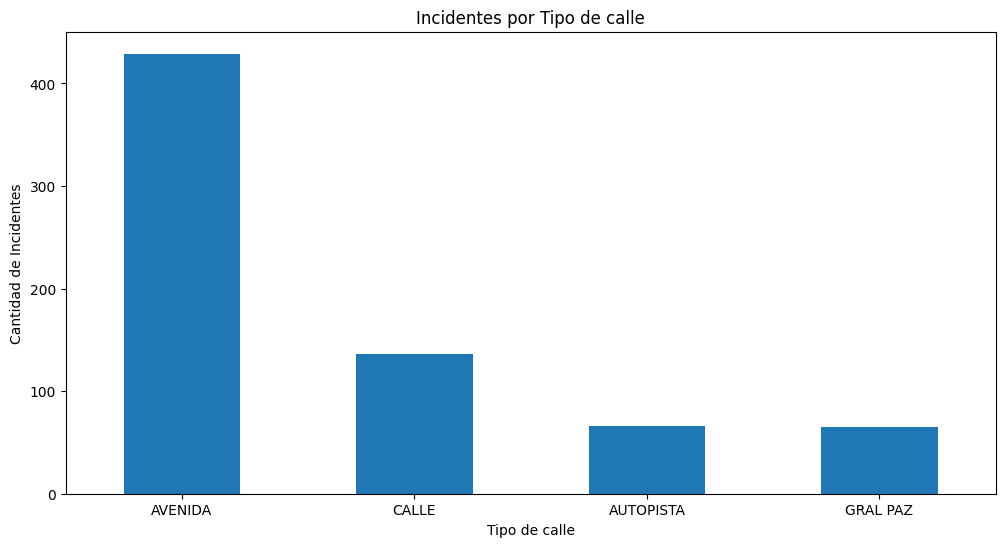

In [269]:
# Calcula la cantidad de incidentes por tipo de calle
incidentes_por_calle = df_hechos_homicidios['TIPO_DE_CALLE'].value_counts()
incidentes_por_calle.plot(kind='bar', figsize=(12, 6))
plt.title(f'Incidentes por Tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=0)
plt.show()

La mayor cantidad de accidentes son producidos en Avenida con gran diferencia.

Inspeccionar si existe tambien una diferencia significativa segun el horario

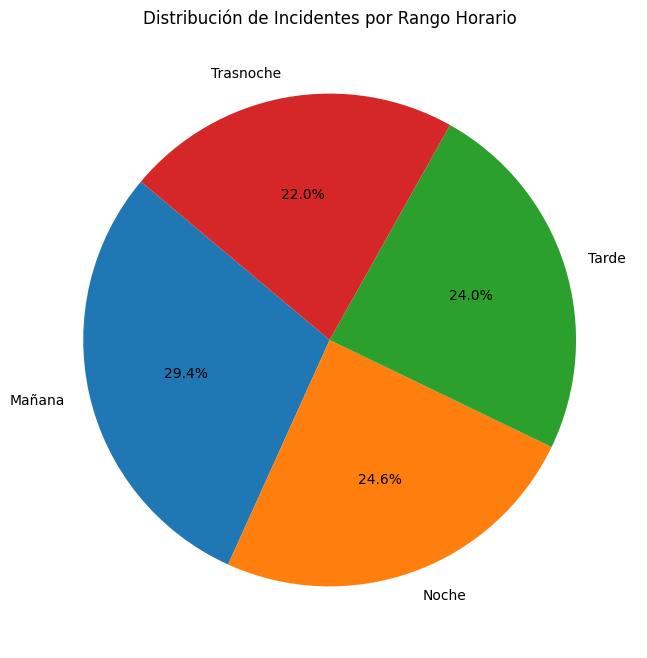

In [270]:
# Convierto la columna 'HORA' a formato de cadena (string)
df_hechos['HORA'] = df_hechos['HORA'].astype(str)

# Defino los rangos horarios que me interesan
rangos_horarios = {
    'Mañana': ['06:00:01', '12:00:00'],
    'Tarde': ['12:00:01', '18:00:00'],
    'Noche': ['18:00:01', '23:59:59'],
    'Trasnoche': ['00:00:00', '6:00:00']
}

# Creo una nueva columna 'Rango Horario' basada en las condiciones de los rangos horarios
def categorizar_horario(hora):
    for categoria, (inicio, fin) in rangos_horarios.items():
        if inicio <= hora <= fin:
            return categoria

df_hechos['Rango Horario'] = df_hechos['HORA'].apply(categorizar_horario)

# Cuento la frecuencia de cada categoría de rango horario
frecuencia_rangos = df_hechos['Rango Horario'].value_counts()

# Creo un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_rangos, labels=frecuencia_rangos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Incidentes por Rango Horario')
plt.show()


Realmente no hay una gran diferencia, todos presentan una cantidad similar en cuanto a rango horario general

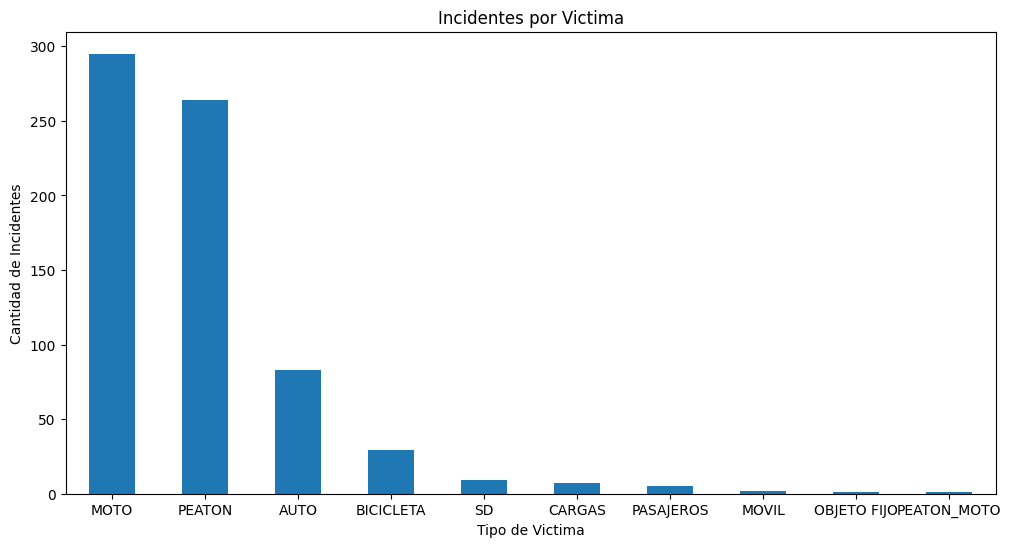

In [271]:
# Calculo la cantidad de incidentes por tipo de victima
incidentes_por_calle = df_hechos['VICTIMA'].value_counts()

# Creo un gráfico de barras
incidentes_por_calle.plot(kind='bar', figsize=(12, 6))
plt.title(f'Incidentes por Victima')
plt.xlabel('Tipo de Victima')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=0)
plt.show()

La mayor cantidad de victimas de accidentes son Motociclistas.

In [272]:
# Filtrolas filas que contienen valores nulos en alguna columna para examinarlos de cerca.
filas_con_nulos = df_hechos[df_hechos.isna().any(axis=1)]
filas_con_nulos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Rango Horario
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD,Noche
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,Trasnoche
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD,Noche
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,Mañana
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO,Trasnoche
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO,Noche
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO,None
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,Mañana
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,Mañana


In [273]:
# Inspecciono nuevamente la cantidad de nulos y como son pocos los elimino.
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Dirección Normalizada  688 non-null    object        
 12  COMUNA                 696 non-null    int64         
 13  XY (C

In [274]:
df_hechos = df_hechos.dropna()

Creo una columna Tipo de Incidente para realizar pruebas a futuro

In [276]:
df_hechos['Tipo de Incidente'] = 'Homicidio'
df_victimas_homicidios['Tipo de Incidente'] = 'Homicidio'

Fusiono las victimas con los hechos por ID para posterior analisis y manejo en Power Bi

In [277]:

df_homicidios = df_hechos.merge(df_victimas_homicidios, left_on='ID', right_on='ID_hecho')

Exporto como csv

In [49]:
df_homicidios.to_csv('src/homicidios.csv', index=False)

# Transformaciones en Power Bi

Modificacion de los nombres de las columnas y eliminacion de duplicados para mes, dia, hora, victima, tipo de incidente y fecha. Se agregaron las columnas Semestre, DiaDeLaSemana, Rango Horario Asignado, Rango Horario y se elimino la columna XY(CABA) por ser irrelevante, ya que se tenian las coordenadas x e y por separado.
* Semestre: Indica si es primer o segundo semestre el homicidio. 
* DiaDeLaSemana: Indica en forma de texto cual de los siete dias de la semana es. 
* Rango Horario Asignado: Diferencia en un rango de dos horas por hora el hecho ocurrido.
* Rango Horario: Indica si el accidente ocurrio de maniana, tarde, noche o trasnoche.


Una vez actualizado el csv en Power Bi, lo cargo nuevamente para graficar los KPI y otros analisis

In [41]:
homicidios_df= pd.read_csv('src/homicidiosactualizado.csv', delimiter=';')

In [45]:
homicidios_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MES', 'DIA', 'HORA',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'pos x', 'pos y',
       'Rango Horario', 'Tipo de Incidente', 'PARTICIPANTES', 'VICTIMA',
       'ACUSADO', 'ROL_VICTIMA', 'SEXO_VICTIMA', 'EDAD_VICTIMA',
       'FECHA_FALLECIMIENTO', 'Semestre', 'DiaDeLaSemana', 'COMUNA',
       'Rango Horario Asignado'],
      dtype='object')

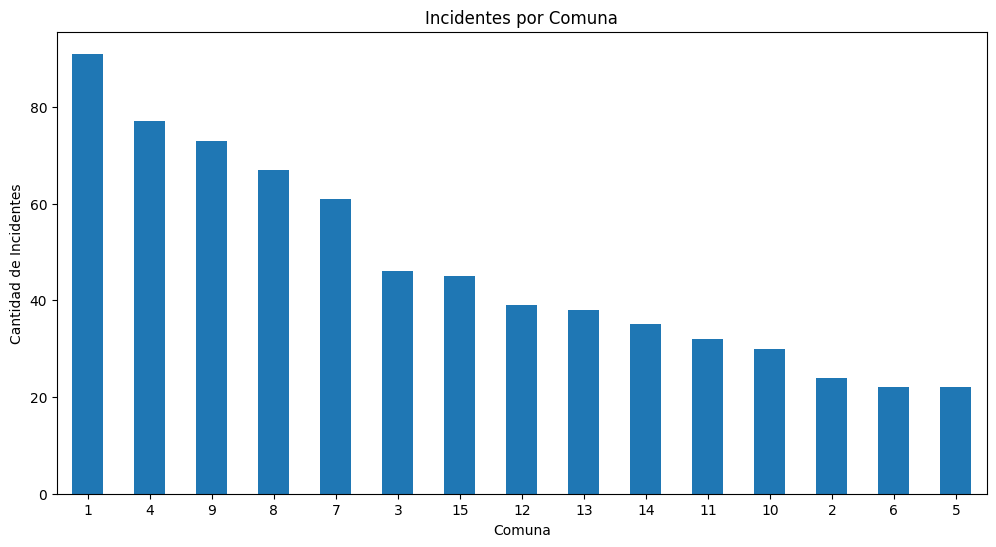

In [254]:

# Calculo la cantidad de incidentes por comuna
incidentes_por_comuna = homicidios_df['COMUNA'].value_counts()

# Creo un gráfico de barras
incidentes_por_comuna.plot(kind='bar', figsize=(12, 6))
plt.title(f'Incidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=0) 
plt.show()

La comuna 1 (El conocido Microcentro de Buenos Aires) es donde mas accidentes de producen

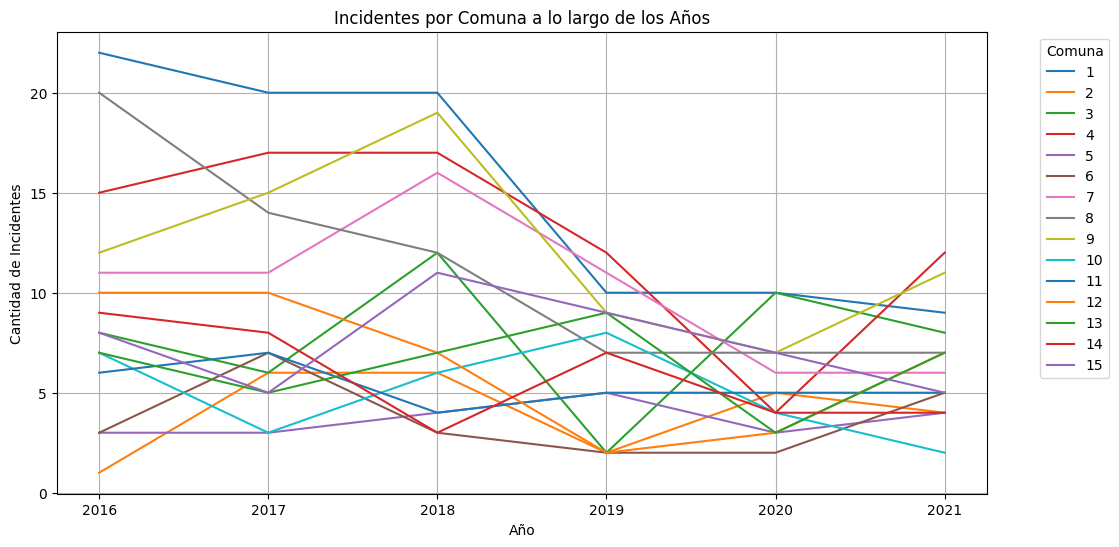

In [253]:
# Agrupo los datos por año ('AAAA') y comuna, y cuento la cantidad de incidentes en cada grupo
incidentes_por_comuna = homicidios_df.groupby(['AAAA', 'COMUNA']).size().unstack(fill_value=0)

# Creo un gráfico de líneas para visualizar la tendencia a lo largo de los años
incidentes_por_comuna.plot(kind='line', figsize=(12, 6))
plt.title('Incidentes por Comuna a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Incidentes')
plt.legend(title='Comuna', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Vemos que en una tendencia general, las comunas con mas accidentes van disminuyendo a lo largo del tiempo

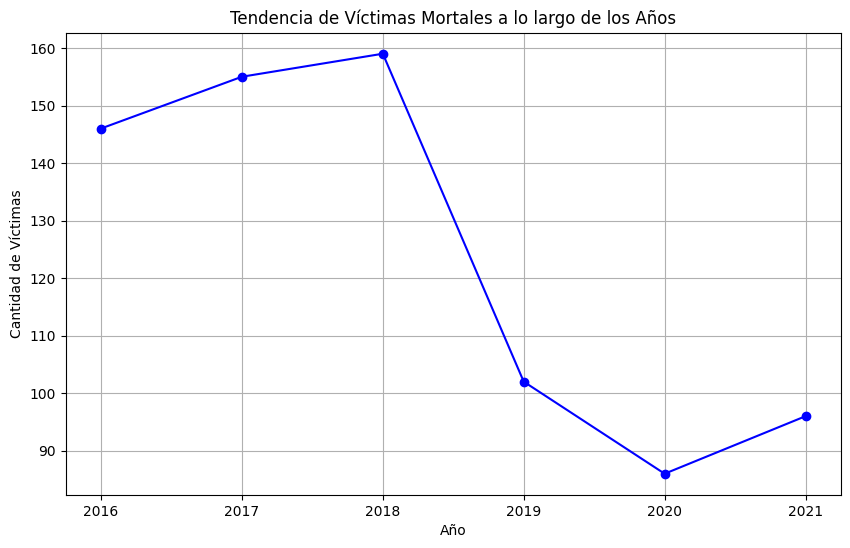

In [259]:
data = homicidios_df.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(data['AAAA'], data['N_VICTIMAS'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Tendencia de Víctimas Mortales a lo largo de los Años')
plt.grid(True)
plt.show()

Se observa una reduccion significativa de la cantidad de victimas y accidentes a partir de 2019, seguramente condicionada por la pandemia del COVID-19

# KPI 1
* Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

In [288]:
# Agrupo y sumo la cantidad de víctimas por año y semestre
df_agrupado = homicidios_df.groupby(['AAAA', 'Semestre'])['N_VICTIMAS'].sum().reset_index()

# Pivote para obtener el formato deseado
tabla_pivote = df_agrupado.pivot(index='AAAA', columns='Semestre', values='N_VICTIMAS').reset_index()

# Calculo la evolución entre el segundo y el primer semestre
tabla_pivote['Evolución (%)'] = ((tabla_pivote['Segundo Semestre'] - tabla_pivote['Primer Semestre']) / tabla_pivote['Primer Semestre']) * 100

# Renombro las columnas
tabla_pivote.rename(columns={'AAAA': 'Anio'}, inplace=True)

Creo una tabla pivote para observar por separado los semestres y la evolucion en porcentaje de un semestre a otro.

In [289]:
tabla_pivote

Semestre,Anio,Primer Semestre,Segundo Semestre,Evolución (%)
0,2016,66,80,21.212121
1,2017,76,79,3.947368
2,2018,75,84,12.000000
3,2019,57,45,-21.052632
4,2020,30,56,86.666667
5,2021,54,42,-22.222222


Calculo la tasa de homicidios para el primer y segundo semestre

In [290]:
# Población total estimada para CABA segun los datos publicos de la Ciudad de Buenos Aires
poblacion_total = 3000000

tabla_pivote['Tasa Homicidios Primer Semestre'] = (tabla_pivote['Primer Semestre'] / poblacion_total) * 100000
tabla_pivote['Tasa Homicidios Segundo Semestre'] = (tabla_pivote['Segundo Semestre'] / poblacion_total) * 100000

Creo una columna objetivo para saber cual es el valor esperado segun el KPI

In [291]:
tabla_pivote['Objetivo'] = (tabla_pivote['Tasa Homicidios Primer Semestre'] - tabla_pivote['Tasa Homicidios Primer Semestre'] * 10/100)


Agrego una columna 'Cumplimiento Objetivo' para saber si se cumple el KPI

In [292]:
tabla_pivote['Cumplimiento Objetivo'] = np.where(
    tabla_pivote['Tasa Homicidios Segundo Semestre'] >= tabla_pivote['Objetivo'],
    'No',
    'Si'
)

Veo el resultado final de la tabla pivote y grafico

In [293]:
tabla_pivote

Semestre,Anio,Primer Semestre,Segundo Semestre,Evolución (%),Tasa Homicidios Primer Semestre,Tasa Homicidios Segundo Semestre,Objetivo,Cumplimiento Objetivo
0,2016,66,80,21.212121,2.200000,2.666667,1.98,No
1,2017,76,79,3.947368,2.533333,2.633333,2.28,No
2,2018,75,84,12.000000,2.500000,2.800000,2.25,No
3,2019,57,45,-21.052632,1.900000,1.500000,1.71,Si
4,2020,30,56,86.666667,1.000000,1.866667,0.90,No
5,2021,54,42,-22.222222,1.800000,1.400000,1.62,Si


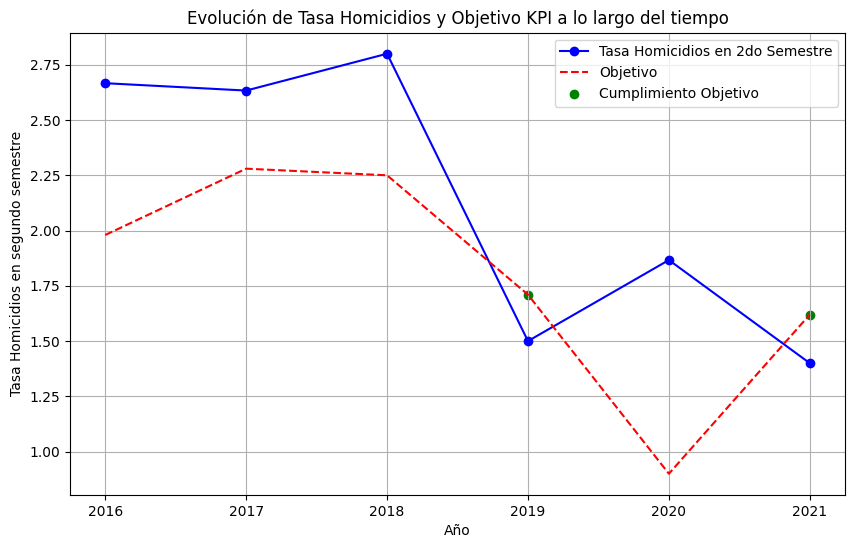

In [294]:
data = tabla_pivote[['Anio', 'Tasa Homicidios Segundo Semestre', 'Objetivo', 'Cumplimiento Objetivo']]
plt.figure(figsize=(10, 6))
# Añado una línea para la tasa de homicidios en el segundo semestre
plt.plot(data['Anio'], data['Tasa Homicidios Segundo Semestre'], marker='o', linestyle='-', color='b', label='Tasa Homicidios en 2do Semestre')

# Añado otra línea para el objetivo
plt.plot(data['Anio'], data['Objetivo'], linestyle='--', color='r', label='Objetivo')

# Marco los puntos donde se cumple el objetivo
cumplido = data[data['Cumplimiento Objetivo'] == 'Si']
plt.scatter(cumplido['Anio'], cumplido['Objetivo'], color='g', label='Cumplimiento Objetivo')

plt.xlabel('Año')
plt.ylabel('Tasa Homicidios en segundo semestre')
plt.title('Evolución de Tasa Homicidios y Objetivo KPI a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()

Como podemos observar tanto en la tabla como en el grafico, solamente en los años 2019 y 2021 se cumple el KPI proporcionado.

# KPI 2
* Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

In [295]:
# Filtro solo los registros de accidentes mortales de motociclistas
motociclistas_df = homicidios_df[homicidios_df['VICTIMA'] == 'MOTO']

# Agrupo por año ('AAAA') y cuento la cantidad de accidentes mortales
accidentes_por_anio = motociclistas_df.groupby('AAAA').size().reset_index(name='Accidentes')

# Calculo la diferencia porcentual entre el año actual y el año anterior
accidentes_por_anio['Diferencia Porcentual'] = (
    accidentes_por_anio['Accidentes'].pct_change(periods=1, fill_method='pad') * 100
)
# Calculo el objetivo del KPI (7% menos que el año anterior)
accidentes_por_anio['Objetivo'] = accidentes_por_anio['Accidentes'].shift(1) * 0.93

# Calculo la diferencia porcentual entre el año actual y el año anterior
accidentes_por_anio['Diferencia Porcentual'] = (
    (accidentes_por_anio['Accidentes'] - accidentes_por_anio['Accidentes'].shift(1)) /
    accidentes_por_anio['Accidentes'].shift(1) * 100
)

In [296]:
accidentes_por_anio

,AAAA,Accidentes,Diferencia Porcentual,Objetivo
0,2016,63,NaN,NaN
1,2017,54,-14.285714,58.59
2,2018,57,5.555556,50.22
3,2019,48,-15.789474,53.01
4,2020,27,-43.750000,44.64
5,2021,45,66.666667,25.11


In [297]:
# Agrego una columna 'Cumplido' al DataFrame
accidentes_por_anio['Cumplido'] = accidentes_por_anio['Accidentes'] <= accidentes_por_anio['Objetivo']

# Muestro 'Si' si se cumplió el objetivo y 'No' si no se cumplió
accidentes_por_anio['Cumplido'] = accidentes_por_anio['Cumplido'].apply(lambda x: 'Si' if x else 'No')

In [299]:
accidentes_por_anio

,AAAA,Accidentes,Diferencia Porcentual,Objetivo,Cumplido
0,2016,63,NaN,NaN,No
1,2017,54,-14.285714,58.59,Si
2,2018,57,5.555556,50.22,No
3,2019,48,-15.789474,53.01,Si
4,2020,27,-43.750000,44.64,Si
5,2021,45,66.666667,25.11,No


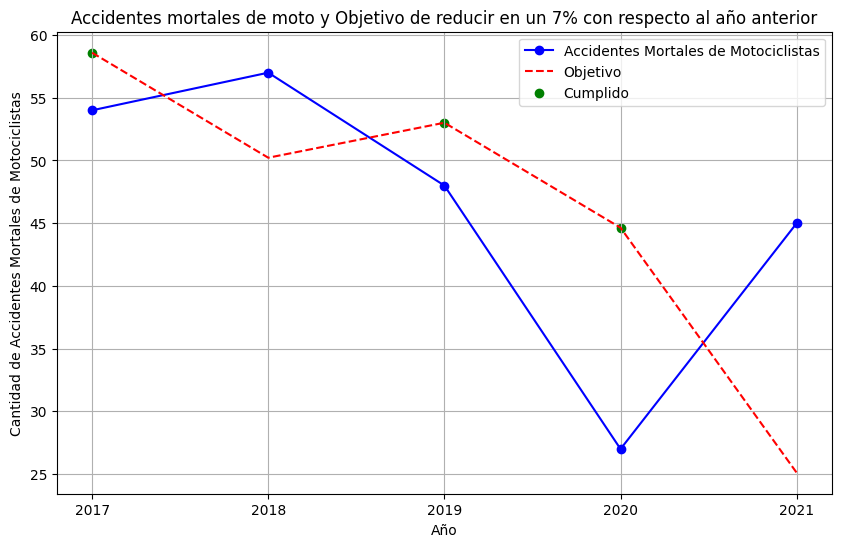

In [302]:
# Filtro el DataFrame para eliminar el año 2016 ya que no tiene un objetivo definido
accidentes_por_anio = accidentes_por_anio[accidentes_por_anio['Objetivo'].notna()]

# Selecciono las columnas relevantes
data = accidentes_por_anio[['AAAA', 'Accidentes', 'Objetivo', 'Cumplido']]

plt.figure(figsize=(10, 6)) 

# Añado una línea para la evolución de accidentes mortales de motociclistas
plt.plot(data['AAAA'], data['Accidentes'], marker='o', linestyle='-', color='b', label='Accidentes Mortales de Motociclistas')

# Añado una línea adicional para el objetivo
plt.plot(data['AAAA'], data['Objetivo'], linestyle='--', color='r', label='Objetivo')

# Marco los puntos donde se cumple el objetivo
cumplido = data[data['Cumplido'] == 'Si']
plt.scatter(cumplido['AAAA'], cumplido['Objetivo'], color='g', label='Cumplido')

plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes Mortales de Motociclistas')
plt.title('Accidentes mortales de moto y Objetivo de reducir en un 7% con respecto al año anterior')
plt.grid(True)
plt.legend()

# Establezco valores enteros en el eje x
plt.xticks(data['AAAA'].astype(int))


plt.show()

Como podemos observar, en este caso el KPI se cumple en los anios 2020, 2019 y 2017.

# KPI 3

* Reducir en un 5% la cantidad de accidentes en la Comuna 1 respecto al año anterior. Siendo la comuna que mas accidentes presenta de manera historica y la mas concurrida de CABA

In [303]:
# Filtro los accidentes de la Comuna 1
accidentes_comuna_1 = homicidios_df[homicidios_df['COMUNA'] == 1]

# Agrupo por año y sumo la cantidad total de víctimas
victimas_por_anio = accidentes_comuna_1.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
victimas_por_anio.rename(columns={'N_VICTIMAS': 'Total_Victimas'}, inplace=True)

# Calculo la reducción en un 5% respecto al año anterior
victimas_por_anio['Total_Victimas_Anterior'] = victimas_por_anio['Total_Victimas'].shift(1)
victimas_por_anio['Objetivo'] = victimas_por_anio['Total_Victimas_Anterior'] * 0.95  # Reducción del 5%

# Calculo si se cumplió el objetivo del KPI
victimas_por_anio['Cumplido'] = victimas_por_anio['Total_Victimas'] <= victimas_por_anio['Objetivo']

# Muestro 'Si' si se cumplió el objetivo y 'No' si no se cumplió
victimas_por_anio['Cumplido'] = victimas_por_anio['Cumplido'].apply(lambda x: 'Si' if x else 'No')

In [306]:
victimas_por_anio

,AAAA,Total_Victimas,Total_Victimas_Anterior,Objetivo,Cumplido
0,2016,22,NaN,NaN,No
1,2017,26,22.0,20.9,No
2,2018,22,26.0,24.7,Si
3,2019,10,22.0,20.9,Si
4,2020,10,10.0,9.5,No
5,2021,9,10.0,9.5,Si


Como podemos ver, en este caso solo en 2018, 2019 y 2021 se logro reducir en un 5% los accidentes en la comuna 1.

C:\Temp\ipykernel_15884\2300813230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AAAA'] = data['AAAA'].astype(int)


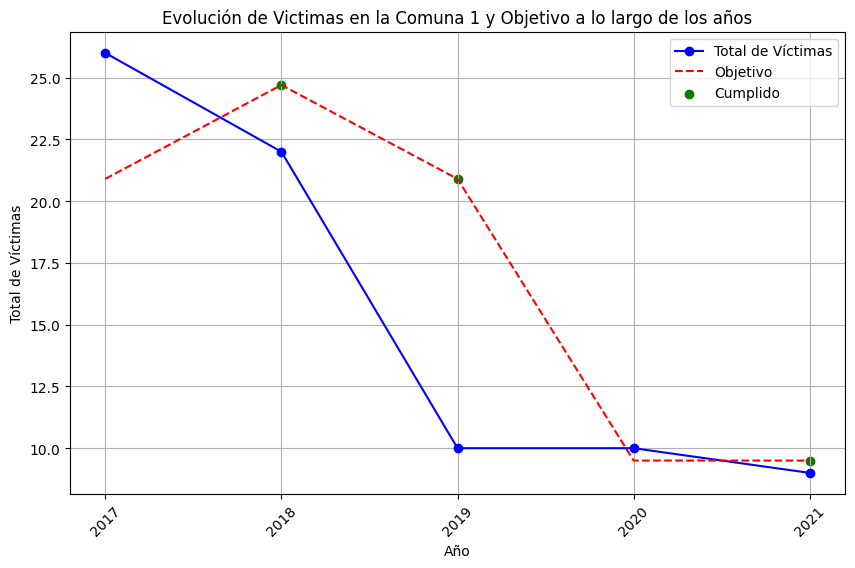

In [308]:

# Filtro el DataFrame para eliminar el año 2016 ya que no tiene un objetivo definido
victimas_por_anio = victimas_por_anio[victimas_por_anio['Objetivo'].notna()]

data = victimas_por_anio[['AAAA', 'Total_Victimas', 'Objetivo', 'Cumplido']]

data['AAAA'] = data['AAAA'].astype(int)

plt.figure(figsize=(10, 6))

# Añado una línea para la evolución del total de víctimas
plt.plot(data['AAAA'], data['Total_Victimas'], marker='o', linestyle='-', color='b', label='Total de Víctimas')

# Añado una línea adicional para el objetivo
plt.plot(data['AAAA'], data['Objetivo'], linestyle='--', color='r', label='Objetivo')

# Marco los puntos donde se cumple el objetivo
cumplido = data[data['Cumplido'] == 'Si']
plt.scatter(cumplido['AAAA'], cumplido['Objetivo'], color='g', label='Cumplido')

plt.xlabel('Año')
plt.ylabel('Total de Víctimas')
plt.title('Evolución de Victimas en la Comuna 1 y Objetivo a lo largo de los años')
plt.grid(True)
plt.legend()

# Establezco el formato del eje X para mostrar valores enteros
plt.xticks(data['AAAA'], rotation=45, fontsize=10)
plt.show()

Solo se cumple el KPI en los años 2021, 2019 y 2018. Siendo casi concretado el objetivo tambien en 2020.